<a href="https://colab.research.google.com/github/anupammaiti10/SpamDetection/blob/main/SpamDetected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Manupulation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Attempt to read with 'latin-1' encoding
try:
    df = pd.read_csv("Spam.csv", encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' fails, try 'cp1252'
    try:
        df = pd.read_csv("Spam.csv", encoding='cp1252')
    except UnicodeDecodeError:
        # If both fail, raise the original error
        raise
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['label', 'text']

In [ ]:
df.shape
df.isnull().sum().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   399 non-null    object
 1   text    399 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


,label,text
count,399,399
unique,2,398
top,ham,1) Go to write msg 2) Put on Dictionary mode 3...
freq,349,2


In [ ]:
print(df['label'].isnull().sum())  # Count nulls in 'label' column

# Remove rows with null labels (choose the appropriate method)
df.dropna(subset=['label'], inplace=True)

0


#Data Visualization

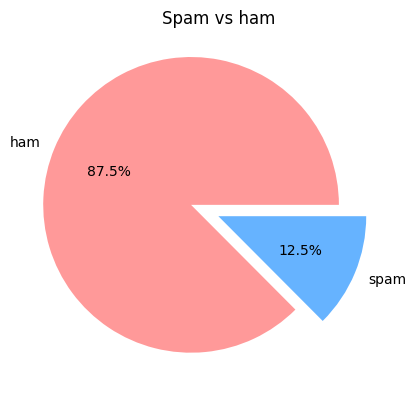

In [ ]:
len_ham=len(df[df["label"]=="ham"])
len_spam=len(df[df["label"]=="spam"])
arr=np.array([len_ham,len_spam])
labels=["ham","spam"]
colors = ['#ff9999', '#66b3ff']
plt.pie(arr,labels=labels,  autopct='%1.1f%%', explode=(0.2,0.0),colors=colors)
plt.title("Spam vs ham")
plt.show()

#Text Preprocess

In [ ]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    return x

df["Preprocessed Text"] = df["text"].apply(lambda x: text_preprocess(x))

In [ ]:
#replace hum=0 and spam=1
df["label"]=df["label"].map({"ham":0,"spam":1})

In [ ]:
df["Preprocessed Text"]
# df["text"]

,Preprocessed Text
0,"go until jurong point, crazy.. available only ..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...
4,"nah i do not think he goes to usf, he lives ar..."
...,...
394,you will go to walmart. i.ll stay.
395,"i have not forgotten you, i might have a coupl..."
396,oh great. i.ll disturb him more so that we can...
397,reverse is cheating. that is not mathematics.


#Data spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Before splitting into train and test sets:
#
 # Convert the 'text' column to strings
X=df["Preprocessed Text"]
Y=df["label"]
#training set contain 80% and rest of the data set contain test set with 20%
#first X_train then X_test then rest of the data set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print(y_train)

3      0
18     0
377    0
248    0
177    0
      ..
71     0
106    0
270    0
348    1
102    0
Name: label, Length: 319, dtype: int64


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Convert text to word count vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

#Train the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

#Evaluate model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred=model.predict(X_test_vec)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.88      0.93         8

    accuracy                           0.99        80
   macro avg       0.99      0.94      0.96        80
weighted avg       0.99      0.99      0.99        80



#Test on new data

In [ ]:
new_message = ["Congratulations! You've won a $1000 gift card!"]
new_message_vec = vectorizer.transform(new_message)
prediction = model.predict(new_message_vec)
#see the probabilities for each class
probablities=model.predict_proba(new_message_vec)
print(probablities)
# print(prediction)
print("Spam" if prediction[0] == 1 else "Ham")

[[0.11409027 0.88590973]]
Spam
